<a href="https://colab.research.google.com/github/codeby3/searchable-encryption/blob/main/zilliz/dcpe/subset_zilliz_dcpe_vector_search_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [ ]:
!pip install -qU beir sentence-transformers pymilvus datasets pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.1/228.1 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 107.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.3/55.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21

In [ ]:
!pip install --upgrade --quiet torch torchvision --extra-index-url https://download.pytorch.org/whl/cu118

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.1/204.1 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
from beir import util
from beir.datasets.data_loader import GenericDataLoader
from beir.retrieval.evaluation import EvaluateRetrieval
import pandas as pd
from pymilvus import MilvusClient, FieldSchema, DataType, CollectionSchema, Collection
from sentence_transformers import SentenceTransformer
import torch
from google.colab import userdata
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import base64
import time
import numpy as np
import sys
import os
import random

/usr/local/lib/python3.11/dist-packages/beir/util.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [9]:
sys.path.append(os.getcwd())
import dcpe


In [10]:
DCPE_KEY = dcpe.DCPEKey.generate_random(scaling_factor=1.2) # Using a scaling factor of 1.2
DCPE_APPROXIMATION_FACTOR = 1.0 # Using an approximation factor of 1.0 for a good tradeoff between sceurity and accuracy

# Load Datasets
We're using 3 datasets from the BEIR datasets - nfcorpus, fiqa and scidocs (https://huggingface.co/datasets/BeIR/beir)

In [11]:
datasets_to_load = ["nfcorpus", "fiqa", "scidocs"]
beir_data_path = "./beir_datasets" # Local directory to store BEIR data
os.makedirs(beir_data_path, exist_ok=True)
loaded_beir_data = {}

In [12]:
for dataset_name in datasets_to_load:
    print(f"\nProcessing dataset: {dataset_name}")

    # Step 3a: Download the dataset
    url = f"https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/{dataset_name}.zip"
    out_dir = os.path.join(beir_data_path, dataset_name)

    if not os.path.exists(out_dir):
        print(f"Downloading {dataset_name} from {url} to {out_dir}...")
        data_path = util.download_and_unzip(url, out_dir)
        print(f"Downloaded {dataset_name} to: {data_path}")
    else:
        print(f"Dataset {dataset_name} already exists at {out_dir}. Skipping download.")
        data_path = out_dir

    # Step 3b: Load the corpus, queries, and qrels
    try:
        corpus, queries, qrels = GenericDataLoader(data_folder=data_path).load(split="test")
        loaded_beir_data[dataset_name] = {
            "corpus": corpus,
            "queries": queries,
            "qrels": qrels
        }
        print(f"Successfully loaded data for {dataset_name}.")
        print(f"  Corpus size: {len(corpus)} documents")
        print(f"  Queries size: {len(queries)} queries")
        print(f"  Qrels size: {len(qrels)} relevance judgments")

        # Print a sample document and query to verify
        if len(corpus) > 0:
            sample_doc_id = list(corpus.keys())[0]
            print(f"  Sample corpus entry ({sample_doc_id}): {corpus[sample_doc_id]['title']} - {corpus[sample_doc_id]['text'][:100]}...")
        if len(queries) > 0:
            sample_query_id = list(queries.keys())[0]
            print(f"  Sample query entry ({sample_query_id}): {queries[sample_query_id][:100]}...")

    except Exception as e:
        print(f"Error loading {dataset_name}: {e}")


Processing dataset: nfcorpus


./beir_datasets/nfcorpus/nfcorpus.zip:   0%|          | 0.00/2.34M [00:00<?, ?iB/s]

Downloaded nfcorpus to: ./beir_datasets/nfcorpus/nfcorpus


  0%|          | 0/3633 [00:00<?, ?it/s]

Successfully loaded data for nfcorpus.
  Corpus size: 3633 documents
  Queries size: 323 queries
  Qrels size: 323 relevance judgments
  Sample corpus entry (MED-10): Statin Use and Breast Cancer Survival: A Nationwide Cohort Study from Finland - Recent studies have suggested that statins, an established drug group in the prevention of cardiovas...
  Sample query entry (PLAIN-2): Do Cholesterol Statin Drugs Cause Breast Cancer?...

Processing dataset: fiqa


./beir_datasets/fiqa/fiqa.zip:   0%|          | 0.00/17.1M [00:00<?, ?iB/s]

Downloaded fiqa to: ./beir_datasets/fiqa/fiqa


  0%|          | 0/57638 [00:00<?, ?it/s]

Successfully loaded data for fiqa.
  Corpus size: 57638 documents
  Queries size: 648 queries
  Qrels size: 648 relevance judgments
  Sample corpus entry (3):  - I'm not saying I don't like the idea of on-the-job training too, but you can't expect the company to...
  Sample query entry (8): How to deposit a cheque issued to an associate in my business into my business account?...

Processing dataset: scidocs


./beir_datasets/scidocs/scidocs.zip:   0%|          | 0.00/136M [00:00<?, ?iB/s]

Downloaded scidocs to: ./beir_datasets/scidocs/scidocs


  0%|          | 0/25657 [00:00<?, ?it/s]

Successfully loaded data for scidocs.
  Corpus size: 25657 documents
  Queries size: 1000 queries
  Qrels size: 1000 relevance judgments
  Sample corpus entry (632589828c8b9fca2c3a59e97451fde8fa7d188d): A hybrid of genetic algorithm and particle swarm optimization for recurrent network design - An evolutionary recurrent network which automates the design of recurrent neural/fuzzy networks usin...
  Sample query entry (78495383450e02c5fe817e408726134b3084905d): A Direct Search Method to solve Economic Dispatch Problem with Valve-Point Effect...


### Using subsets of data

In [13]:
SUBSET_QUERY_PERCENTAGE = 0.05
RANDOM_SEED = 42 # VERY IMPORTANT: Use a fixed seed for reproducibility!

random.seed(RANDOM_SEED)
subset_beir_data = {}

In [14]:
for dataset_name, data in loaded_beir_data.items():
    print(f"\nCreating subset for dataset: {dataset_name}")

    corpus = data["corpus"]
    queries = data["queries"]
    qrels = data["qrels"]

    # Create a subset of queries ---
    num_queries_subset = int(len(queries) * SUBSET_QUERY_PERCENTAGE)
    query_ids = list(queries.keys())
    # Ensure there are queries to sample from
    if num_queries_subset > 0 and len(query_ids) >= num_queries_subset:
        subset_query_ids = set(random.sample(query_ids, num_queries_subset))
    else:
        subset_query_ids = set(query_ids) # Use all if subset is too small or percentage is 100%

    subset_queries = {qid: queries[qid] for qid in subset_query_ids}
    print(f"  Selected {len(subset_queries)} queries (out of {len(queries)})")

    # Create a corpus subset containing only relevant documents for the query subset ---
    # This is a better approach than random corpus sampling for ensuring evaluation is meaningful.
    relevant_corpus_ids = set()
    for qid in subset_query_ids:
        if qid in qrels:
            for doc_id, score in qrels[qid].items():
                if score > 0: # A score > 0 indicates relevance
                    relevant_corpus_ids.add(doc_id)

    # Filter the main corpus to only include these relevant documents
    subset_corpus = {cid: corpus[cid] for cid in relevant_corpus_ids if cid in corpus}
    print(f"  Selected {len(subset_corpus)} documents relevant to the query subset.")

    # Filter qrels to match the new query and corpus subsets ---
    subset_qrels = {}
    for qid, doc_scores in qrels.items():
        if qid in subset_query_ids: # Only consider queries in our subset
            filtered_scores = {did: score for did, score in doc_scores.items() if did in subset_corpus}
            if filtered_scores: # Only add the query if it has relevant docs in the subset
                subset_qrels[qid] = filtered_scores
    print(f"  Filtered qrels to {len(subset_qrels)} queries with relevant documents in the new corpus subset.")


    # Store the new subset data ---
    subset_beir_data[dataset_name] = {
        "corpus": subset_corpus,
        "queries": subset_queries,
        "qrels": subset_qrels
    }


Creating subset for dataset: nfcorpus
  Selected 16 queries (out of 323)
  Selected 713 documents relevant to the query subset.
  Filtered qrels to 16 queries with relevant documents in the new corpus subset.

Creating subset for dataset: fiqa
  Selected 32 queries (out of 648)
  Selected 100 documents relevant to the query subset.
  Filtered qrels to 32 queries with relevant documents in the new corpus subset.

Creating subset for dataset: scidocs
  Selected 50 queries (out of 1000)
  Selected 241 documents relevant to the query subset.
  Filtered qrels to 50 queries with relevant documents in the new corpus subset.


Using all-MiniLM-L6-v2 embedding model from HuggingFace SentenceTransformers Library. It generates embeddings of 384 dimensions.



In [15]:
device = "cuda" if torch.cuda.is_available() else "cpu"

# Load the model
try:
    embedding_model = SentenceTransformer("all-MiniLM-L6-v2", device=device)
    print(f"Model 'all-MiniLM-L6-v2' loaded successfully on {device}.")
    # Verify model output dimension (all-MiniLM-L6-v2 has 384 dimensions)
    dummy_embedding = embedding_model.encode("test sentence")
    print(f"Model output dimension: {len(dummy_embedding)}")

except Exception as e:
    print(f"Failed to load embedding model: {e}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model 'all-MiniLM-L6-v2' loaded successfully on cuda.
Model output dimension: 384


Batch ingestion

In [16]:
DIMENSION = 384 # Dimension for all-MiniLM-L6-v2
BATCH_SIZE = 64
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
ingestion_metrics = {}

# --- Leakage Metric 1: Spearman Rank Correlation (Distance Structure Leakage) ---

In [17]:
# --- Leakage Metric 1: Spearman Rank Correlation (Distance Structure Leakage) ---

import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import spearmanr

def compute_spearman_leakage(embedding_model, dcpe_key, dcpe_approx_factor, corpus, sample_size=1000, metric='cosine'):
    # 1. Sample vectors
    doc_ids = list(corpus.keys())
    np.random.seed(42)
    if len(doc_ids) > sample_size:
        sampled_ids = np.random.choice(doc_ids, sample_size, replace=False)
    else:
        sampled_ids = doc_ids
    texts = [f"{corpus[did].get('title','')} {corpus[did].get('text','')}".strip() for did in sampled_ids]
    # 2. Compute plaintext embeddings
    plain_vecs = embedding_model.encode(texts, convert_to_numpy=True)
    # 3. Compute encrypted embeddings
    enc_vecs = np.array([
        dcpe.encrypt_vector(dcpe_key, v.tolist(), dcpe_approx_factor).ciphertext
        for v in plain_vecs
    ])
    # 4. Compute distance matrices
    D_plain = cdist(plain_vecs, plain_vecs, metric=metric)
    D_enc = cdist(enc_vecs, enc_vecs, metric=metric)
    # 5. Flatten upper triangles
    iu = np.triu_indices(len(sampled_ids), k=1)
    plain_flat = D_plain[iu]
    enc_flat = D_enc[iu]
    # 6. Spearman correlation
    rho, _ = spearmanr(plain_flat, enc_flat)
    print(f"Spearman rank correlation (ρ) between plaintext and encrypted distances: {rho:.4f}")
    return rho

# --- Leakage Metric 2: Nearest-Neighbour Re-identification Attack ---



In [18]:
# --- Leakage Metric 2: Nearest-Neighbour Re-identification Attack ---

def reidentification_attack(embedding_model, dcpe_key, dcpe_approx_factor, corpus, dict_size=10000, probe_size=1000, metric='cosine'):
    doc_ids = list(corpus.keys())
    np.random.seed(42)
    if len(doc_ids) < dict_size + probe_size:
        dict_ids = doc_ids[:len(doc_ids)//2]
        probe_ids = doc_ids[len(doc_ids)//2:]
    else:
        dict_ids = np.random.choice(doc_ids, dict_size, replace=False)
        probe_ids = np.random.choice([d for d in doc_ids if d not in dict_ids], probe_size, replace=False)
    dict_texts = [f"{corpus[did].get('title','')} {corpus[did].get('text','')}".strip() for did in dict_ids]
    probe_texts = [f"{corpus[did].get('title','')} {corpus[did].get('text','')}".strip() for did in probe_ids]
    dict_vecs = embedding_model.encode(dict_texts, convert_to_numpy=True)
    probe_vecs = embedding_model.encode(probe_texts, convert_to_numpy=True)
    dict_enc = np.array([dcpe.encrypt_vector(dcpe_key, v.tolist(), dcpe_approx_factor).ciphertext for v in dict_vecs])
    probe_enc = np.array([dcpe.encrypt_vector(dcpe_key, v.tolist(), dcpe_approx_factor).ciphertext for v in probe_vecs])
    # For "insider" probes, use some dict_enc vectors
    insider_enc = dict_enc[:probe_size]
    # For each probe, compute distances to all dict_enc
    hit1, hit5 = 0, 0
    for i, q in enumerate(insider_enc):
        dists = np.linalg.norm(dict_enc - q, axis=1)
        rank = np.argsort(dists).tolist().index(i) + 1
        if rank == 1: hit1 += 1
        if rank <= 5: hit5 += 1
    print(f"Re-identification Hit@1: {hit1/probe_size:.4f}, Hit@5: {hit5/probe_size:.4f}")
    return hit1/probe_size, hit5/probe_size

# --- Leakage Metric 3: Attribute-Inference Attack ---


In [19]:
# --- Leakage Metric 3: Attribute-Inference Attack ---

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def attribute_inference(embedding_model, dcpe_key, dcpe_approx_factor, corpus, label_func, sample_size=2000):
    # label_func: function(doc) -> 0 or 1
    doc_ids = list(corpus.keys())
    np.random.seed(42)
    if len(doc_ids) > sample_size:
        sampled_ids = np.random.choice(doc_ids, sample_size, replace=False)
    else:
        sampled_ids = doc_ids
    texts = [f"{corpus[did].get('title','')} {corpus[did].get('text','')}".strip() for did in sampled_ids]
    labels = [label_func(corpus[did]) for did in sampled_ids]
    vecs = embedding_model.encode(texts, convert_to_numpy=True)
    enc_vecs = np.array([dcpe.encrypt_vector(dcpe_key, v.tolist(), dcpe_approx_factor).ciphertext for v in vecs])
    X_train, X_test, y_train, y_test = train_test_split(enc_vecs, labels, test_size=0.2, random_state=42)
    clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"Attribute inference accuracy on encrypted vectors: {acc:.4f}")
    return acc

# --- Leakage Metric 4: Membership-Inference via Minimum Distance ---


In [20]:
# --- Leakage Metric 4: Membership-Inference via Minimum Distance ---

from sklearn.metrics import roc_auc_score

def membership_inference(embedding_model, dcpe_key, dcpe_approx_factor, corpus, index_size=1000, probe_size=500):
    doc_ids = list(corpus.keys())
    np.random.seed(42)
    max_index_size = len(doc_ids) // 2
    max_probe_size = min(len(doc_ids) - max_index_size, probe_size)
    # Adjust sizes if not enough data
    index_size = min(index_size, max_index_size)
    probe_size = min(probe_size, max_probe_size, index_size)

    if len(doc_ids) < index_size + probe_size:
        index_ids = doc_ids[:index_size]
        probe_ids = doc_ids[index_size:index_size+probe_size]
    else:
        index_ids = np.random.choice(doc_ids, index_size, replace=False)
        probe_ids = np.random.choice([d for d in doc_ids if d not in index_ids], probe_size, replace=False)
    index_texts = [f"{corpus[did].get('title','')} {corpus[did].get('text','')}".strip() for did in index_ids]
    probe_texts = [f"{corpus[did].get('title','')} {corpus[did].get('text','')}".strip() for did in probe_ids]
    index_vecs = embedding_model.encode(index_texts, convert_to_numpy=True)
    probe_vecs = embedding_model.encode(probe_texts, convert_to_numpy=True)
    index_enc = np.array([dcpe.encrypt_vector(dcpe_key, v.tolist(), dcpe_approx_factor).ciphertext for v in index_vecs])
    # Member probes: re-encrypt some index vectors
    member_probes = np.array([dcpe.encrypt_vector(dcpe_key, v.tolist(), dcpe_approx_factor).ciphertext for v in index_vecs[:probe_size]])
    nonmember_probes = np.array([dcpe.encrypt_vector(dcpe_key, v.tolist(), dcpe_approx_factor).ciphertext for v in probe_vecs[:probe_size]])
    # For each probe, compute min distance to index
    def min_dist(probe):
        return np.min(np.linalg.norm(index_enc - probe, axis=1))
    member_scores = [min_dist(p) for p in member_probes]
    nonmember_scores = [min_dist(p) for p in nonmember_probes]
    # Invert distances → similarities so larger = “more member-like”
    y_true  = [1]*len(member_scores) + [0]*len(nonmember_scores)
    max_d   = max(member_scores + nonmember_scores)
    y_score = [(max_d - s) for s in (member_scores + nonmember_scores)]
    auc = roc_auc_score(y_true, y_score)
    print(f"Membership inference AUC: {auc:.4f} (0.5 = random)")
    return auc

# --- Leakage Metric 5: Absolute Distance-Distortion ---


In [21]:
# --- Leakage Metric 5: Absolute Distance-Distortion ---

def absolute_distance_distortion(embedding_model, dcpe_key, dcpe_approx_factor, corpus, sample_size=1000, metric='cosine'):
    doc_ids = list(corpus.keys())
    np.random.seed(42)
    if len(doc_ids) > sample_size:
        sampled_ids = np.random.choice(doc_ids, sample_size, replace=False)
    else:
        sampled_ids = doc_ids
    texts = [f"{corpus[did].get('title','')} {corpus[did].get('text','')}".strip() for did in sampled_ids]
    plain_vecs = embedding_model.encode(texts, convert_to_numpy=True)
    enc_vecs = np.array([dcpe.encrypt_vector(dcpe_key, v.tolist(), dcpe_approx_factor).ciphertext for v in plain_vecs])
    D_plain = cdist(plain_vecs, plain_vecs, metric=metric)
    D_enc = cdist(enc_vecs, enc_vecs, metric=metric)
    iu = np.triu_indices(len(sampled_ids), k=1)
    plain_flat = D_plain[iu]
    enc_flat = D_enc[iu]
    mask = plain_flat != 0
    rel_err = np.abs(plain_flat[mask] - enc_flat[mask]) / plain_flat[mask]
    mean_distortion = np.mean(rel_err)
    print(f"Mean absolute distance distortion: {mean_distortion:.4f}")
    return mean_distortion

In [22]:
def attribute_inference(embedding_model, dcpe_key, dcpe_approx_factor, corpus, label_func, sample_size=2000):
    doc_ids = list(corpus.keys())
    np.random.seed(42)
    if len(doc_ids) > sample_size:
        sampled_ids = np.random.choice(doc_ids, sample_size, replace=False)
    else:
        sampled_ids = doc_ids
    texts = [f"{corpus[did].get('title','')} {corpus[did].get('text','')}".strip() for did in sampled_ids]
    labels = [label_func(corpus[did]) for did in sampled_ids]
    # Print label distribution
    unique, counts = np.unique(labels, return_counts=True)
    print("Label counts:", dict(zip(unique, counts)))
    if len(set(labels)) < 2:
        print("Skipping attribute inference: only one class present in labels.")
        return None
    vecs = embedding_model.encode(texts, convert_to_numpy=True)
    enc_vecs = np.array([dcpe.encrypt_vector(dcpe_key, v.tolist(), dcpe_approx_factor).ciphertext for v in vecs])
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    X_train, X_test, y_train, y_test = train_test_split(enc_vecs, labels, test_size=0.2, random_state=42)
    clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)
    acc = accuracy_score(y_test, clf.predict(X_test))
    print(f"Attribute inference accuracy on encrypted vectors: {acc:.4f}")
    return acc

In [23]:
def get_label_func(dataset_name):
    if dataset_name == "nfcorpus":
        # Try several keywords or use text length, etc.
        return lambda doc: int('disease' in doc.get('title','').lower())
    elif dataset_name == "fiqa":
        # Try 'question' vs 'answer' or even/odd length as fallback
        return lambda doc: int('question' in doc.get('title','').lower())
    elif dataset_name == "scidocs":
        return lambda doc: int('science' in doc.get('title','').lower())
    else:
        # Fallback: even/odd length of title
        return lambda doc: len(doc.get('title','')) % 2

In [24]:
for dataset_name, data in subset_beir_data.items():
    print(f"\n--- Leakage metrics for {dataset_name} ---")
    corpus = data["corpus"]
    compute_spearman_leakage(embedding_model, DCPE_KEY, DCPE_APPROXIMATION_FACTOR, corpus)
    reidentification_attack(embedding_model, DCPE_KEY, DCPE_APPROXIMATION_FACTOR, corpus)
    label_func = get_label_func(dataset_name)
    attribute_inference(embedding_model, DCPE_KEY, DCPE_APPROXIMATION_FACTOR, corpus, label_func=label_func)
    membership_inference(embedding_model, DCPE_KEY, DCPE_APPROXIMATION_FACTOR, corpus)
    absolute_distance_distortion(embedding_model, DCPE_KEY, DCPE_APPROXIMATION_FACTOR, corpus)


--- Leakage metrics for nfcorpus ---
Spearman rank correlation (ρ) between plaintext and encrypted distances: 0.9895
Re-identification Hit@1: 0.3560, Hit@5: 0.3560
Label counts: {np.int64(0): np.int64(661), np.int64(1): np.int64(52)}
Attribute inference accuracy on encrypted vectors: 0.9371
Membership inference AUC: 1.0000 (0.5 = random)
Mean absolute distance distortion: 0.0244

--- Leakage metrics for fiqa ---
Spearman rank correlation (ρ) between plaintext and encrypted distances: 0.9893
Re-identification Hit@1: 0.0500, Hit@5: 0.0500
Label counts: {np.int64(0): np.int64(100)}
Skipping attribute inference: only one class present in labels.
Membership inference AUC: 1.0000 (0.5 = random)
Mean absolute distance distortion: 0.0208

--- Leakage metrics for scidocs ---
Spearman rank correlation (ρ) between plaintext and encrypted distances: 0.9860
Re-identification Hit@1: 0.1200, Hit@5: 0.1200
Label counts: {np.int64(0): np.int64(241)}
Skipping attribute inference: only one class present

Collect Results in a DataFrame


In [25]:
import pandas as pd

results = []

for dataset_name, data in subset_beir_data.items():
    print(f"\n--- Leakage metrics for {dataset_name} ---")
    corpus = data["corpus"]
    spearman = compute_spearman_leakage(embedding_model, DCPE_KEY, DCPE_APPROXIMATION_FACTOR, corpus)
    reid_hit1, reid_hit5 = reidentification_attack(embedding_model, DCPE_KEY, DCPE_APPROXIMATION_FACTOR, corpus)
    label_func = get_label_func(dataset_name)
    attr_inf = attribute_inference(embedding_model, DCPE_KEY, DCPE_APPROXIMATION_FACTOR, corpus, label_func=label_func)
    member_auc = membership_inference(embedding_model, DCPE_KEY, DCPE_APPROXIMATION_FACTOR, corpus)
    distortion = absolute_distance_distortion(embedding_model, DCPE_KEY, DCPE_APPROXIMATION_FACTOR, corpus)
    results.append({
        "Dataset": dataset_name,
        "Spearman ρ": spearman,
        "Re-ID Hit@1": reid_hit1,
        "Re-ID Hit@5": reid_hit5,
        "Attr. Inf. Acc": attr_inf,
        "Membership AUC": member_auc,
        "Distortion": distortion
    })

results_df = pd.DataFrame(results)
display(results_df)


--- Leakage metrics for nfcorpus ---
Spearman rank correlation (ρ) between plaintext and encrypted distances: 0.9896
Re-identification Hit@1: 0.3560, Hit@5: 0.3560
Label counts: {np.int64(0): np.int64(661), np.int64(1): np.int64(52)}
Attribute inference accuracy on encrypted vectors: 0.9371
Membership inference AUC: 1.0000 (0.5 = random)
Mean absolute distance distortion: 0.0245

--- Leakage metrics for fiqa ---
Spearman rank correlation (ρ) between plaintext and encrypted distances: 0.9889
Re-identification Hit@1: 0.0500, Hit@5: 0.0500
Label counts: {np.int64(0): np.int64(100)}
Skipping attribute inference: only one class present in labels.
Membership inference AUC: 1.0000 (0.5 = random)
Mean absolute distance distortion: 0.0216

--- Leakage metrics for scidocs ---
Spearman rank correlation (ρ) between plaintext and encrypted distances: 0.9863
Re-identification Hit@1: 0.1200, Hit@5: 0.1200
Label counts: {np.int64(0): np.int64(241)}
Skipping attribute inference: only one class present

,Dataset,Spearman ρ,Re-ID Hit@1,Re-ID Hit@5,Attr. Inf. Acc,Membership AUC,Distortion
0,nfcorpus,0.989583,0.356,0.356,0.937063,1.0,0.024544
1,fiqa,0.988856,0.050,0.050,NaN,1.0,0.021602
2,scidocs,0.986320,0.120,0.120,NaN,1.0,0.018206


Plot the Results

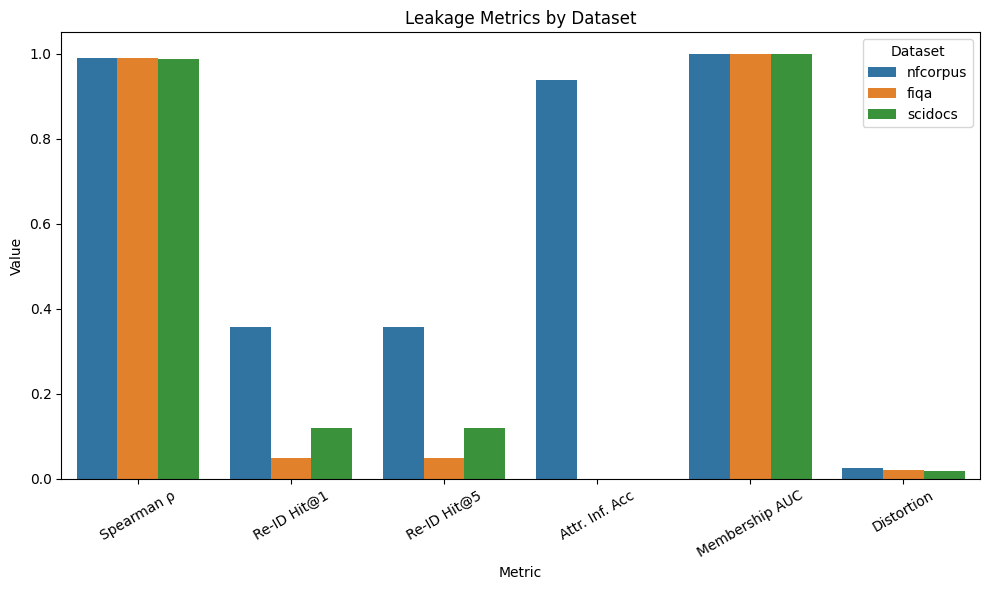

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the DataFrame for easier plotting
metrics_to_plot = ["Spearman ρ", "Re-ID Hit@1", "Re-ID Hit@5", "Attr. Inf. Acc", "Membership AUC", "Distortion"]
df_melted = results_df.melt(id_vars="Dataset", value_vars=metrics_to_plot, var_name="Metric", value_name="Value")

plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x="Metric", y="Value", hue="Dataset")
plt.title("Leakage Metrics by Dataset")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()